# Laptop Price Prediction Task !

## Import Neccessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Read Data

In [3]:
df = pd.read_csv("E:\Machine Learning\Kaggle Projects\Laptop Price\laptop_price.csv" , encoding="ISO-8859-1")

In [4]:
df.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


## Explore Our Data

In [5]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [7]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [8]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

### Check Missing Values , Duplicates

In [9]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [10]:
#duplicate values
df.duplicated().sum()

np.int64(0)

### Data Analsysis && Extract Hidden Patterns

In [11]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

<Axes: xlabel='Company'>

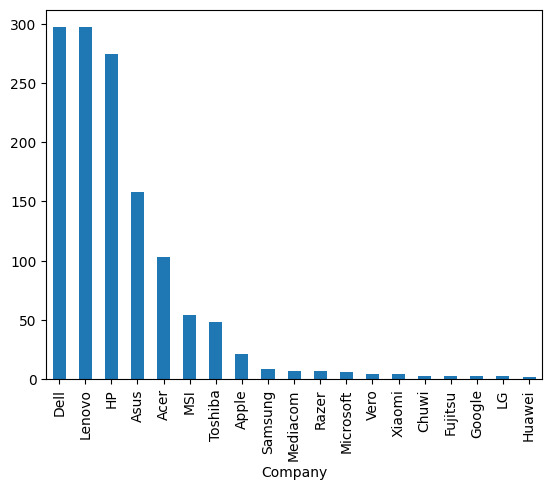

In [12]:
df['Company'].value_counts().plot(kind='bar')

We Notice That Most Sell Company is Dell

<Axes: xlabel='Product'>

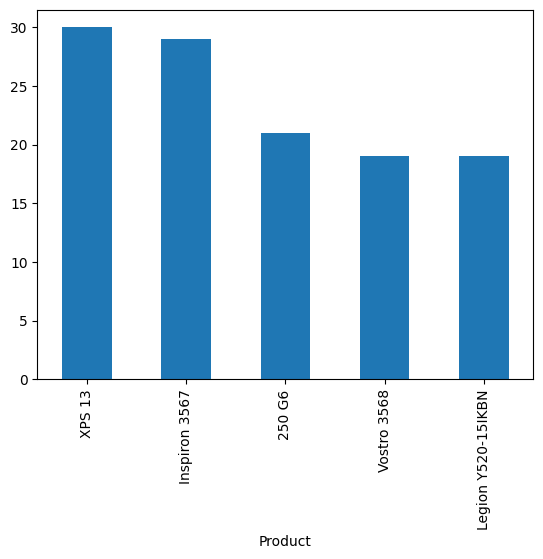

In [13]:
df['Product'].value_counts().head().plot(kind='bar')

Best Selling Product is XPS 13

In [14]:
# each Products for each type name
print(df.groupby(['TypeName','Product'])['Product'].count())

TypeName            Product                             
2 in 1 Convertible  Aspire R7                               2
                    CB5-132T-C9KK (N3160/4GB/32GB/Chrome    1
                    Chromebook C738T-C2EJ                   1
                    Chromebook Flip                         2
                    Chromebook Plus                         1
                                                           ..
Workstation         ZBook 15u                               1
                    ZBook 17                                5
                    ZBook Studio                            2
                    Zbook 15                                1
                    Zbook 17                                1
Name: Product, Length: 660, dtype: int64


<Axes: xlabel='Company'>

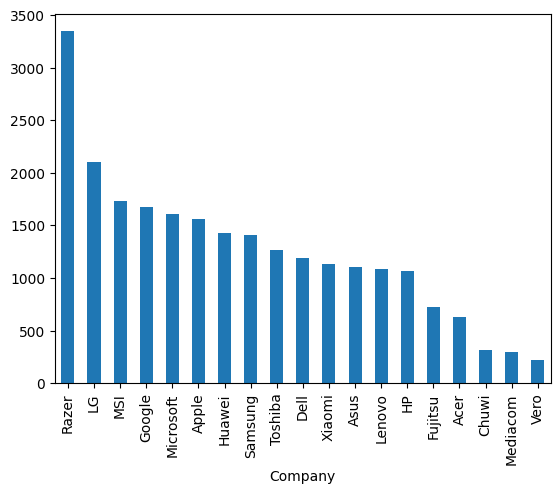

In [15]:
df.groupby(['Company'])['Price_euros'].mean().astype(int).sort_values(ascending=False).plot(kind='bar')

Best Company Selling is **Razer**

<Axes: xlabel='Company,OpSys'>

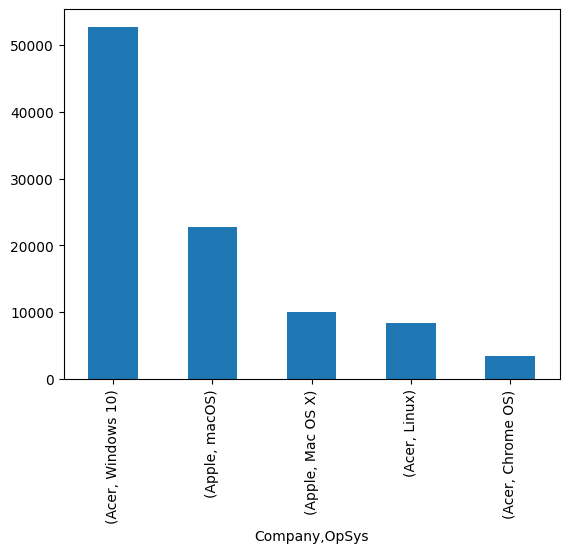

In [16]:
df.groupby(['Company', 'OpSys'])['Price_euros'].sum().head().sort_values(ascending=False).plot(kind='bar')

We Notice That Best Selling Company is **Acer** With **Windows 10**

In [17]:
df['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
Fujitsu        3
Google         3
LG             3
Huawei         2
Name: count, dtype: int64

In [18]:
df['Inches'].value_counts()

Inches
15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
13.5      6
12.0      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64

In [19]:
print(df['ScreenResolution'].unique())
print(df['ScreenResolution'].nunique())

['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080' 'Touchscreen / Quad HD+ 3200x1800'
 'IPS Panel Touchscreen 1920x1200' 'Touchscreen 2256x1504'
 'Quad HD+ / Touchscreen 3200x1800' 'IPS Panel 1366x768'
 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160'
 'IPS Panel Full HD 2160x1440' '4K Ultra HD / Touchscreen 3840x2160'
 'Touchscreen 2560x1440' '1600x900' 'IPS Panel 4K Ultra HD 3840x2160'
 '4K Ultra HD 3840x2160' 'Touchscreen 1366x768'
 'IPS Panel Full HD 1366x768' 'IPS Panel 2560x1440'
 'IPS Panel Full HD 2560x1440' 'IPS Panel Retina Display 2736x1824'
 'Touchscreen 2400x1600' '2560x1440' 'IPS Panel Quad HD+ 2560x1440'
 'IPS Panel Quad HD+ 3200x1800'
 'IPS Panel Quad HD+ / Touchscreen 3200x1800'
 'IPS Panel Touchscreen 1366x768' '1920x1080'
 'IPS Panel Full HD 1920x1200'
 'IP

We Have 40 unique value in **ScreenResolution**

In [20]:
for i in df.columns:
    print(f"{i}", df[i].nunique())

laptop_ID 1303
Company 19
Product 618
TypeName 6
Inches 18
ScreenResolution 40
Cpu 118
Ram 9
Memory 39
Gpu 110
OpSys 9
Weight 179
Price_euros 791


## Feature Engineering && Data Cleaning & Transformation

In [21]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

 We Don't Need Laptop ID , 

In [22]:
laptop_id =df.drop(columns=['laptop_ID'],inplace=True)

In [23]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


### Feature Extraction

In [24]:
df['IsTouchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [25]:
df['Width'] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)')[0].astype(int)
df['Height'] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)')[1].astype(int)

In [26]:
df['IsTouchscreen'].value_counts()
df.drop(columns=['ScreenResolution'],inplace=True)

We Notice That this Column is Imbalanced So We Will Not Use it

In [27]:
df['Height'].value_counts().head(50)

Height
1080    841
768     308
2160     43
1800     31
1440     31
900      27
1600     10
1504      6
1200      5
1824      1
Name: count, dtype: int64

In [28]:
df['Width'].value_counts().head(50)

Width
1920    846
1366    308
3840     43
2560     29
3200     27
1600     23
2304      6
2256      6
1440      4
2880      4
2400      4
2160      2
2736      1
Name: count, dtype: int64

In [29]:
df['Area'] = df['Width'] * df['Height']
df['Area'] =df['Area'] /1000

In [30]:
df['Area']

0       4096.000
1       1296.000
2       2073.600
3       5184.000
4       4096.000
          ...   
1298    2073.600
1299    5760.000
1300    1049.088
1301    1049.088
1302    1049.088
Name: Area, Length: 1303, dtype: float64

In [31]:
df.head(2)

,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,IsTouchscreen,Width,Height,Area
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,2560,1600,4096.0
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,1440,900,1296.0


In [32]:
df['PPI'] = ((df['Width']**2 + df['Height']**2)**0.5 / df['Inches']).astype(int)

In [33]:
df['SSD']=df['Memory'].apply(lambda x: 1 if 'SSD' in x else 0)
df['HDD']=df['Memory'].apply(lambda x: 1 if 'HDD' in x else 0)
df['Flash_Storage']=df['Memory'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

In [34]:
df['Cpu_Brand'] = df['Cpu'].apply(lambda x: x.split()[0])

Lets Make Prompt Help Us For Extract Hidden Patterns !

In [35]:
#prompt : Extract only the GHz part from the Cpu column
import re

df['GPU_Number'] = df['Gpu'].apply(lambda x: re.search(r'(\d+)$', x))
df['GPU_Number'] = df['GPU_Number'].apply(lambda match: int(match.group(1)) if match else None)
df['GPU_Number'].fillna(df['GPU_Number'].median(),inplace=True)
df['GPU_Number'] = df['GPU_Number'].astype(int)
df.drop(columns=['Gpu'],inplace=True)

In [36]:

# Extract only the GB part from the Memory column
df['Memory_Capacity_GB'] = df['Memory'].apply(lambda x: re.search(r'(\d+)\s*GB', x).group(1) if isinstance(x, str) and re.search(r'(\d+)\s*GB', x) else None)
df['Memory_Capacity_GB'] = df['Memory_Capacity_GB'].astype(float)  # Convert to float first
df['Memory_Capacity_GB'].fillna(df['Memory_Capacity_GB'].median(), inplace=True)
df['Memory_Capacity_GB'] = df['Memory_Capacity_GB'].astype(int)
df.drop(columns=['Memory'], inplace=True)

In [37]:
# prompt :Extract the GHz part from the Cpu column
df['Cpu_GHz'] = df['Cpu'].apply(lambda x: float(re.search(r'(\d+(\.\d+)?)GHz', x).group(1)) if re.search(r'(\d+(\.\d+)?)GHz', x) else None)
df['Cpu_GHz'].fillna(df['Cpu_GHz'].median(),inplace=True)
df['Cpu_GHz'] = df['Cpu_GHz'].astype(float)
df.drop(columns=['Cpu'],inplace=True)


Now We Extracted Many Features , Lets Go To Transform This Features

### Feature Transformation For Model Training

In [38]:
df.head(2)

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,IsTouchscreen,Width,Height,Area,PPI,SSD,HDD,Flash_Storage,Cpu_Brand,GPU_Number,Memory_Capacity_GB,Cpu_GHz
0,Apple,MacBook Pro,Ultrabook,13.3,8GB,macOS,1.37kg,1339.69,0,2560,1600,4096.0,226,1,0,0,Intel,640,128,2.3
1,Apple,Macbook Air,Ultrabook,13.3,8GB,macOS,1.34kg,898.94,0,1440,900,1296.0,127,0,0,1,Intel,6000,128,1.8


In [39]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OpSys', 'Weight',
       'Price_euros', 'IsTouchscreen', 'Width', 'Height', 'Area', 'PPI', 'SSD',
       'HDD', 'Flash_Storage', 'Cpu_Brand', 'GPU_Number', 'Memory_Capacity_GB',
       'Cpu_GHz'],
      dtype='object')

In [40]:
## Convert Ram into int
df['Ram'] = df['Ram'].str.replace('GB','')
df['Ram'] = df['Ram'].astype('int')

In [41]:
## Convert Weight into float
df['Weight'] = df['Weight'].str.replace('kg','')
df['Weight'] = df['Weight'].astype('float')

In [42]:
df['Product'].value_counts()

Product
XPS 13                                   30
Inspiron 3567                            29
250 G6                                   21
Vostro 3568                              19
Legion Y520-15IKBN                       19
                                         ..
ThinkPad L460                             1
V510-15IKB (i5-7200U/8GB/256GB/FHD/No     1
Rog GL502VS                               1
Rog GL553VE-FY052T                        1
17-ak001nv (A6-9220/4GB/500GB/Radeon      1
Name: count, Length: 618, dtype: int64

We Notice That Product Name Has Many Unique Values , THis is Will note help us Because Company and Type Name Gives Us Same Inoformation

In [43]:
### Product Frequency
product_frequency = df['Product'].value_counts()
df['Product'] = df['Product'].map(product_frequency)


Insted Of Remove Product Name We Used Frequency Method

In [44]:
df.head()

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,IsTouchscreen,Width,Height,Area,PPI,SSD,HDD,Flash_Storage,Cpu_Brand,GPU_Number,Memory_Capacity_GB,Cpu_GHz
0,Apple,10,Ultrabook,13.3,8,macOS,1.37,1339.69,0,2560,1600,4096.0,226,1,0,0,Intel,640,128,2.3
1,Apple,2,Ultrabook,13.3,8,macOS,1.34,898.94,0,1440,900,1296.0,127,0,0,1,Intel,6000,128,1.8
2,HP,21,Notebook,15.6,8,No OS,1.86,575.00,0,1920,1080,2073.6,141,1,0,0,Intel,620,256,2.5
3,Apple,10,Ultrabook,15.4,16,macOS,1.83,2537.45,0,2880,1800,5184.0,220,1,0,0,Intel,455,512,2.7
4,Apple,10,Ultrabook,13.3,8,macOS,1.37,1803.60,0,2560,1600,4096.0,226,1,0,0,Intel,650,256,3.1


## Prepare Data For Modeling

Well We Almost Finish Our EDA journey , Are You Ready !!

In [45]:
df.head()

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,IsTouchscreen,Width,Height,Area,PPI,SSD,HDD,Flash_Storage,Cpu_Brand,GPU_Number,Memory_Capacity_GB,Cpu_GHz
0,Apple,10,Ultrabook,13.3,8,macOS,1.37,1339.69,0,2560,1600,4096.0,226,1,0,0,Intel,640,128,2.3
1,Apple,2,Ultrabook,13.3,8,macOS,1.34,898.94,0,1440,900,1296.0,127,0,0,1,Intel,6000,128,1.8
2,HP,21,Notebook,15.6,8,No OS,1.86,575.00,0,1920,1080,2073.6,141,1,0,0,Intel,620,256,2.5
3,Apple,10,Ultrabook,15.4,16,macOS,1.83,2537.45,0,2880,1800,5184.0,220,1,0,0,Intel,455,512,2.7
4,Apple,10,Ultrabook,13.3,8,macOS,1.37,1803.60,0,2560,1600,4096.0,226,1,0,0,Intel,650,256,3.1


Now We Need To Extract Only Categorical Data To Encode it 

In [46]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

In [47]:
categorical_features

['Company', 'TypeName', 'OpSys', 'Cpu_Brand']

In [48]:
#Convert Categorical Features
from sklearn.preprocessing import LabelEncoder
for feature in categorical_features:
    df[feature] = LabelEncoder().fit_transform(df[feature])

Then We Want to Scale Our Data Using MinMaxScaler Module  range between 0 , 1 

In [49]:
# Extract Target
Target = df['Price_euros']
df.drop(columns=['Price_euros'],inplace=True)


In [50]:
#MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [51]:
X = df
y = Target

Now Our Data is Ready for Splitting and Modeling

In [52]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Lets Strart Our Journey With Model Evaltions

## Work with Models

In [70]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Single Models (Regression)
regression_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'KNN Regressor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor()
}

# Ensemble Models (Regression)
ensemble_regression_models = {
    'Random Forest': RandomForestRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'Bagging': BaggingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

# Hyperparameter Grids (Regression)
param_grids_reg = {
    'Linear Regression': {},  # No hyperparameters for linear regression
    'Ridge Regression': {'alpha': [0.1, 1, 10]},
    'Lasso Regression': {'alpha': [0.1, 1, 10]},
    'KNN Regressor': {'n_neighbors': [3, 5, 7]},
    'Decision Tree': {'max_depth': [None, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'Extra Trees': {'n_estimators': [50, 100, 200]},
    'Bagging': {'n_estimators': [10, 20, 30]},
    'AdaBoost': {'n_estimators': [50, 100, 200]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}

# Cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Model Evaluation and Selection for Regression
best_regression_models = {}
for name, model in regression_models.items():
    grid_search = GridSearchCV(model, param_grids_reg[name], cv=cv, scoring='r2',)
    grid_search.fit(X_train, y_train)
    best_regression_models[name] = grid_search.best_estimator_
    print(f"{name}: Best Parameters - {grid_search.best_params_}, Best Score - {grid_search.best_score_}")

for name, model in ensemble_regression_models.items():
    grid_search = GridSearchCV(model, param_grids_reg[name], cv=cv, scoring='r2')
    grid_search.fit(X_train, y_train)
    best_regression_models[name] = grid_search.best_estimator_
    print(f"{name}: Best Parameters - {grid_search.best_params_}, Best Score - {grid_search.best_score_}")

# Voting and Stacking 
estimators = [('rf', best_regression_models['Random Forest']), ('xgb', best_regression_models['XGBoost'])]
voting_reg = VotingRegressor(estimators=estimators)
voting_reg.fit(X_train, y_train)
best_regression_models['Voting'] = voting_reg

# Evaluate Best Models on Test Set
for name, model in best_regression_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"--- {name} ---")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared: {r2}")


Linear Regression: Best Parameters - {}, Best Score - 0.7182855810908327
Ridge Regression: Best Parameters - {'alpha': 0.1}, Best Score - 0.7200733867255649
Lasso Regression: Best Parameters - {'alpha': 0.1}, Best Score - 0.7199095464301515
KNN Regressor: Best Parameters - {'n_neighbors': 3}, Best Score - 0.72005845069392
Decision Tree: Best Parameters - {'max_depth': 10}, Best Score - 0.7034068154450874
Random Forest: Best Parameters - {'n_estimators': 200}, Best Score - 0.8254108658516314
Extra Trees: Best Parameters - {'n_estimators': 200}, Best Score - 0.8149079839216216
Bagging: Best Parameters - {'n_estimators': 30}, Best Score - 0.8209700259558176
AdaBoost: Best Parameters - {'n_estimators': 50}, Best Score - 0.6320254059876712
Gradient Boosting: Best Parameters - {'n_estimators': 200}, Best Score - 0.8431297359254692
XGBoost: Best Parameters - {'learning_rate': 0.1, 'n_estimators': 200}, Best Score - 0.8427830757234442
--- Linear Regression ---
Mean Squared Error: 147227.926597

Well well well After Using This Dataset with using many Models that Support Regression Technique 


We Notice That Best Model is 



**Random Forest** With ** 83% R2 Accuracy Score **


**Random Forest** With ** 81714 **MSE** Accuracy Score **

**Voting** With  167.92 **MAE**

### Model Saving For Future Using

In [88]:
# Save Model Using Joblib
import joblib
model1=joblib.dump(best_regression_models['Voting'], 'model_MAE.pkl')
model2 =joblib.dump(best_regression_models['Random Forest'], 'model_MSE.pkl')
model3= joblib.dump(best_regression_models['Random Forest'], 'model_R2.pkl')

# Created By : Fares Ashraf 3>